<h1><center><font color='midnightblue'> Assignment Of Hypothesis Testing Part 2:</font></center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
coffee = pd.read_csv("coffee_dataset.csv")
coffee.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


<h2><center><p><font color='blue'>There’s a hypothesis says that ..People who are <font color='crimson'>older than or equal</font> 21 drinks coffee <font color='limegreen'>more than</font> those who are <font color='crimson'>younger than</font> 21.<br> <em>Test This Hypothesis</em><br><em><font color='crimson'>Alternative:</font> 
Avg(drink_coffee >= 21)-Avg(drink_coffee < 21)&gt;0<br><font color='crimson'>Null</font> 
Avg(drink_coffee >= 21)-Avg(drink_coffee < 21)&lt;=0</font><font color='blue'>:</font></font></p></center></h2>

<h2><center><font color='blue'>Getting the average of drinking coffee for the age <font color='crimson'>older than or equal</font> 21:</font></center></h2>

In [3]:
coffee_older = coffee.query("age == '>=21'")

In [4]:
average_older = coffee_older["drinks_coffee"].mean()
print(f'The average of drinking coffee for the age older than or equal 21 is: {average_older}')

The average of drinking coffee for the age older than or equal 21 is: 0.9081508515815085


<h2><center><font color='blue'>Getting the average of drinking coffee for the age <font color='crimson'>younger than</font> 21:</font></center></h2>

In [5]:
coffee_younger = coffee.query("age == '<21'")

In [6]:
average_younger = coffee_younger["drinks_coffee"].mean()
print(f'The average of drinking coffee for the age younger than 21 is: {average_younger}')

The average of drinking coffee for the age younger than 21 is: 0.1962406015037594


<h2><center><font color='blue'>Computing the observed difference in <font color='crimson'>coffee dataset</font>:</font></center></h2>

In [7]:
obs_diff = average_older - average_younger
print(f'The observed difference in coffee dataset is: {obs_diff}')

The observed difference in coffee dataset is: 0.7119102500777491


<h2><center><font color='blue'>Creating <font color='crimson'>sampling distribution</font> of difference in average coffee dataset:</font></center></h2>

In [8]:
diff = []
size = coffee.shape[0]
for _ in range (10000) :
    a_sample = coffee.sample(size , replace = True)
    older = a_sample.query("age == '>=21'")
    avg_older = older["drinks_coffee"].mean()
    younger = a_sample.query("age == '<21'")
    avg_younger = younger["drinks_coffee"].mean()
    diff.append(avg_older - avg_younger)

<h2><center><font color='blue'>Plotting the <font color='crimson'>sampling distribution</font>:</font></center></h2>

(array([  13.,  139.,  606., 1826., 2920., 2660., 1361.,  415.,   54.,
           6.]),
 array([0.66303586, 0.6730835 , 0.68313115, 0.69317879, 0.70322644,
        0.71327408, 0.72332173, 0.73336937, 0.74341701, 0.75346466,
        0.7635123 ]),
 <a list of 10 Patch objects>)

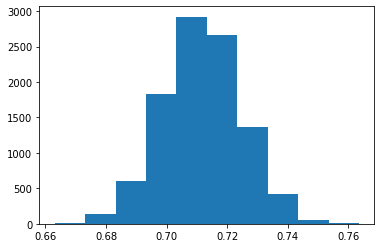

In [9]:
plt.hist(diff)

<h2><center><font color='blue'>Simulating the distribution under the <font color='crimson'>null hypothesis</font>:</font></center></h2>

In [10]:
null = np.random.normal(0 , np.std(diff) , len(diff))

<h2><center><font color='blue'>Plotting the <font color='crimson'>null hypothesis</font><br>Plotting a line for <font color='crimson'>observed statistic</font>:</font></center></h2>

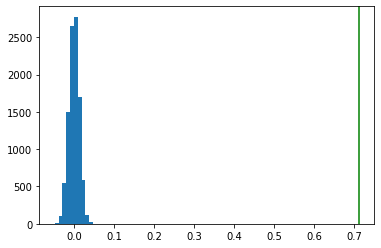

In [11]:
plt.hist(null)

plt.axvline(x = obs_diff , c = 'green')

<h2><center><font color='blue'> Computing the <font color='crimson'>p-value</font>:</font></center></h2>

In [12]:
p_value = (null > obs_diff).mean()
print(f'The p-value is: {p_value}')

The p-value is: 0.0


<h3><font color='limegreen'>We will reject the null hypothesis.</font></h3>